In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# Dataset

given a string(seq of characters) - classify into a class

data : name, nationality(language) (seperated by comma)  
given a name predict nationality.  

need seqence model..as variable number of inputs(characters),.. 

sequence classification problem

In [3]:
# read file and store into arrays.

languages = [] # classes
data = []
X = []
Y = []

with open('name2lang.txt', 'r') as f: 
    for line in f:
        line = line.split(',')
        
        #remove padded white space on sides.
        name = line[0].strip()
        lang = line[1].strip()
        
        # classes
        if not lang in languages:
            languages.append(lang)
            
        X.append(name) # input
        Y.append(lang) # output
        # also storing in a tuple form
        data.append((name, lang))

n_languages = len(languages) # number of classes


In [4]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


In [5]:
print(data[0:10]) # first 10 datapoints

[('Abreu', 'Portuguese'), ('Albuquerque', 'Portuguese'), ('Almeida', 'Portuguese'), ('Alves', 'Portuguese'), ('Araujo', 'Portuguese'), ('Araullo', 'Portuguese'), ('Barros', 'Portuguese'), ('Basurto', 'Portuguese'), ('Belo', 'Portuguese'), ('Cabral', 'Portuguese')]


### Train test split 

train test split can be done on any list - not just numpy arrays 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

# print(X_train)

print(len(X_train), len(X_test))

16040 4010


## Encoding names and language

characters - into numbers (meaningful)  
similarly classes (prob dist.) (one hot)

we want to encode characters for the inputs - as the sequence model takes input character by character here.

total input - concatenation of individual-character-encoding  (matrix)

In [8]:
import string

In [9]:
all_letters = string.ascii_letters + " .,;'" # string of all characters 
# both capital and small ?? 
# albhabets and some special characters - as they may also come in some names.

n_letters = len(all_letters) #dim of vector encoding of one character.

all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

### Representation(numbers) for characters, classes

representation for a name  
tensor of one hots of each character  
number of characters x 1 x one-letter-representation  
**THIS IS BECAUSE MODEL IS GENERALISED FOR BATCHES.**  
The one-hot of character is t-th input to the model.  
HERE : BATCH OF ONE INPUT.

representation for a language  
index of the language in the list-of-languages  
tensor of single value  


#### Indexes (dimensions) : 
a x b x c x d => A [a,b] will be of dimension c x d, and so on.. 

In [10]:
# one hot encoding.
# position of the character in our all-character-list
# turn on(set 1) that index in the vector

def name_rep(name):
    rep = torch.zeros(len(name), 1, n_letters)
    # the '1' in between is becasue - rep[i] will of dimension 1xn_letters
    # we want to give tensor of that dimenesion 1xsomething.
    # tensor of one tensor (row)
    
    for i, letter in enumerate(name):
        pos = all_letters.find(letter) # find pos in the all-character-string
        rep[i][0][pos] = 1 #i-th letter
        # note the 0 in the middle dimension 
    return rep

In [11]:
def lang_rep(lang):
    return torch.tensor( [languages.index(lang)] , dtype=torch.long)
    # index of the language in the list-of-languages

# just index (tensor of single value)
# not one hot 

In [12]:
name_rep('Abreu')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [13]:
lang_rep('Portuguese')

tensor([0])

### Visualisation

In [14]:
# dictionary of language:count
# initialise with count=0
count = {}
for l in languages: 
    count[l] = 0

# iterate over data and update count
for d in data:
    count[d[1]] += 1
    # d[1] -> language

In [15]:
print(count)

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


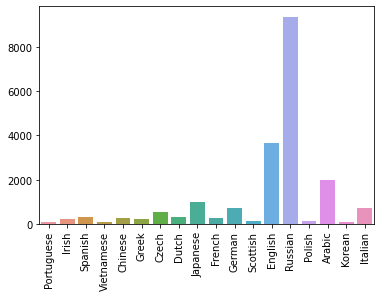

In [16]:
# plot distribution of the languages

plt_ = sns.barplot( x=list(count.keys()), y=list(count.values()) )
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

not all classes in same quantities. - therefore its important to see how the model performs on individual classes(eg: confusion matrix) - not just the aggregate accuracy.

baseline - if all were eq - 1/n . 

a random classifier - but not uniform prob - but with prob proportional to their frequencies..   
expected accuracy of that - can be taken as the baseline. 

another option - always predict russian - that itself will be give a large baseline accuracy. 



# Model (RNN)

The model only has **one recurring unit of RNN**.   
That is what it is. The picture is that unwrapped over time.  

MODEL -> one recurring unit of RNN.  
Forward pass -> one step. current input(in sequence) to output.  
forward also returns state - to be used for next step.  

init state function.  

In [17]:
class RNNNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        # size of "layers"
        # input_size - size of representation of 'one input' - here one letter
        # hidden_size - state 
        # output_size - output - prob dist of classes - number of classes      
        
        super().__init__()
        
        self.hidden_size = hidden_size
        # this is to be used by the init function
        
        # BLOCKS:
        
        # given input, prev state - find next state
        # concatenate input, prev state as whole input
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        # input to hidden state.
        
        # given input, prev state - find output
        # concatenate input and prev state (for input)  
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        # input to output.
        
        self.softmax = nn.LogSoftmax(dim=1)
        
    # FORWARD PASS USING THE BLOCKS :
    
    def forward(self, input_t, hidden_t_1): # t-th input, t-1 th hidden
        
        # use the defined layers(in init) to do the computation
        
        # input - current input
        # hidden - prev hidden(prev state)
        
        # concatenated
        combined = torch.cat( (input_t, hidden_t_1), 1 ) # concatenating along the axis 1. # along row
        
        hidden_t = self.i2h(combined) # find state (from input, prev state) - this will be used in next step
        output_t = self.i2o(combined) # find output (from input, prev state)
        output_t = self.softmax(output_t)
        return output_t, hidden_t # return hidden also -> this will be passed for next step.

    def init_hidden(self): # additional init fn for sequence models - to initialise the hidden layer.
        return torch.zeros(1, self.hidden_size)
    # we know hidden size - so better do inside the class
    # this is for initialising 0th state

why not 'hidden_t to output'?

## Forward pass in RNN (Inference in RNN)

In [18]:
n_hidden = 128 # size of state layer - hyperparameter.
# larger this value greater is the capacity of the n/w (keep track of more things in the state.. )
# but danger of overfitting or not enough data

In [19]:
# model object
rnn = RNNNet(n_letters, n_hidden, n_languages)

in case of FFNN or CNN model- inferece was direct. ouput = model(input) - as simple as that.  
but that is not the case for sequence models.  
### iterate over the input-sequence

In [20]:
# inference routine 

# model,name as input

def infer(model, name): 
    model.eval() # model in eval mode.
    name_ohe = name_rep(name) #one hot encoding for name
    hidden = model.init_hidden() #0-th state. initialise using the class fn.
    
    # ITERATE OVER THE SEQUENCE
    for i in range(name_ohe.size()[0]): # iterate over each character
        output, hidden = model(name_ohe[i], hidden) # forward()
        # name_ohe[i] - tensor of dim 1xn_letters
        # 1xsomething.
        # THIS IS BECAUSE MODEL IS GENERALISED FOR BATCHES.
        # HERE : BATCH OF ONE THING.
        
        # output keeps getting overwritten - what returned is the last ouput.
        # we only want that.
        
        # 'hidden' passed to the next step. (state)
    
    return output

one option is - don't do softmax for inference. as for forward (inference) - we just need the argmax - softmax is monotionic - so gets same argmax.  

softmax for loss.(probability interpretation to use cross-entropy loss) 

In [21]:
output = infer(rnn, 'Adam')
index = torch.argmax(output)
print(output,"\n index: ",  index)

tensor([[-2.9205, -2.8790, -2.8630, -2.9376, -2.9897, -2.8152, -2.7929, -2.9634,
         -2.9317, -2.9798, -2.9047, -2.8030, -2.9530, -2.9034, -2.8858, -2.8091,
         -2.8623, -2.8646]], grad_fn=<LogSoftmaxBackward0>) 
 index:  tensor(6)


the model is not trained.. these are just some values.

### Evaluate

top k accuracy

In [22]:
# dataloader that gives a random sample of data.

def data_subsample(npoints, X, Y):
    # npoints - number of samples we are asking for.
    to_ret = []
    for i in range(npoints):
        rand_index = np.random.randint(len(X)) #random index
        name, lang = X[rand_index], Y[rand_index]
        to_ret.append((name, lang, name_rep(name), lang_rep(lang)))
        # tuple with name-laguage-name_rep-lang_rep
    return to_ret

In [23]:
data_subsample(2, X_train, Y_train)

[('Holoshevsky',
  'Russian',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0.,

**topk** can be called on any tensor(torch fn.). Returns max k values and indices.

In [24]:
# evaluating network on 'n_points' datapoints.
# top k accuracy.

def top_k_accuracy(model, n_points, k, X, Y):
    # X,Y - whole data
    # sub sample with n_points
    
    data = data_subsample(n_points, X, Y)
    
    correct = 0
    
    for name, language, name_ohe, lang_rep in data:
        
        output = infer(model, name)
        
        val, indices = output.topk(k)        
        # max k values and indices
        
        # check if the infered output is in the top k indices.
        if lang_rep in indices:
            correct += 1
            
    accuracy = correct/n_points
    return accuracy

In [25]:
top_k_accuracy(rnn, 1000, 3, X_test, Y_test)

0.224

# Training

### Basic training setup

a loss function (criterion) - and use back propagation to modify the parameters.

in inference we calling the forward several times(iterating over the sequence of input) - we are essentially going through the same network again and again. BP through this (through time) (**BPTT**)  

pytorch does everything for us - it does the book keeping as we go through the same network again and again - and for BP is just calling backward - after doing the forward pass, computing loss variable.   
**essentially its only a composition of many functions - come backward from loss to all the parameters**

all the functional relationships  
**same weights** are part of each iteration - and to be back propagated..   


- loss.backward(retain_graph=True)

## xxxxxx

We are not doing opt.zero_grad within an epoch - So the gradient values computed are added to the existing ones. So finally what we have is sum of gradients over the datapoints in the batch - which is what we need.  

This functionaly in backward() - where gradient is added to what is there - is there for stuff like this. This is why we have to reset them in previous cases - where we don't want to accumulate them.

### Train with one subsample

**This is not "batching". Batching is vectorising over multiple inputs at the same time.**    
The parameter update update is for loss-surface with all those datapoints.   

Here we are passing datapoints in a sample one by one - updating parameter with sum-of-gradients-of-those.  

**No vectorization. But gradient for the sub-sample.**  
No vectorization - that is the difference here - compared to normal batching.  

In [26]:
# function to train on one subsample

def train_subsample(model, subsample_size, loss_fn, opt):
    # model, data, loss_fn, optimizer
    # n_batch - number of data points to be trained on. - like one batch
    
    # data
    data_batch = data_subsample(subsample_size, X_train, Y_train)
    # X_train, Y_train are global   
    
    opt.zero_grad() # reset gradient
    # don't want to retain gradients from previous epoch
    
    total_loss = 0 # over all datapoints in the batch 
    # only for logging
    
    for name, language, name_ohe, lang_rep in data_batch:

        # forward pass (inference)
        # iterate over the input-sequence
        # going thr' same model many times
        hidden = model.init_hidden()       
        for i in range(name_ohe.size()[0]):
            output, hidden = model(name_ohe[i], hidden)
        # the computational graph get generated in the above 
        # end of the day, it all a composition of functions.  
        # then BP happens through that graph.
        
        # loss
        loss = loss_fn(output, lang_rep)
        
        #compute gradients
        loss.backward(retain_graph=True)
        
        total_loss += loss
    
    # update parameters
    opt.step() # update parameters after going through whole batch
    # gradient values are accumulated over the datapoints in the batch
            
    # average loss over datapoints in the batch
    return total_loss/subsample_size

In [27]:
# loss function
loss_fn = nn.NLLLoss() # negative log likelihood.

# optimizer
opt = optim.SGD(rnn.parameters(), lr=0.01, momentum=0.9)

In [28]:
%%time 
train_subsample(rnn, 200, loss_fn, opt)

CPU times: user 299 ms, sys: 11.7 ms, total: 311 ms
Wall time: 166 ms


tensor(2.8638, grad_fn=<DivBackward0>)

In [29]:
top_k_accuracy(rnn, 1000, 1, X_test, Y_test)

0.473

# Train setup

train multiple batches  
takes hyper parameters also as input.  

see how loss is changing  
logging..     
checkpointing  

**umbrella fn - that does everything**

### a good visualization trick - clear cell and plot the updated graph.

In [30]:
from IPython.display import clear_output

# clearing output of a cell.
# for eg: clear and show latest stage of a plot

In [31]:
def train(model, 
          subsample_size = 10, n_subsamples = 100, 
          lr = 0.01, momentum = 0.9, 
          display_freq=5):
    
    # loss function
    loss_fn = nn.NLLLoss()
    # NLL loss - doesn't have an internal softmax
    # if softmax in network - use NLL loss as the loss function.
    # cross entropy loss has an internal softmax. 
    # if that is the loss fn., then don't need softmax in network.
    
    # optimizer
    opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    
    # for logging
    loss_arr = np.zeros(n_subsamples + 1)
    
    
    for i in range(n_subsamples):
        loss_arr[i+1] = ( loss_arr[i]*i + train_subsample(model, subsample_size, loss_fn,  opt) )/(i + 1) 
        # average loss so far.
        
        if i%display_freq == display_freq-1:
            
            clear_output(wait=True) # clear cell output
            
            print('Iteration', i, 
                  'Top-1:', top_k_accuracy(model, len(X_test), 1, X_test, Y_test), 
                  'Top-2:', top_k_accuracy(model, len(X_test), 2, X_test, Y_test), 'Loss', loss_arr[i] )
            plt.figure()
            plt.plot(loss_arr[1:i], '-*')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()
            print('\n\n')
                      

keep appending to a loss array. clear ouput and plot array so far at intervals.

Iteration 99 Top-1: 0.6531172069825436 Top-2: 0.7942643391521197 Loss 1.4660170078277588


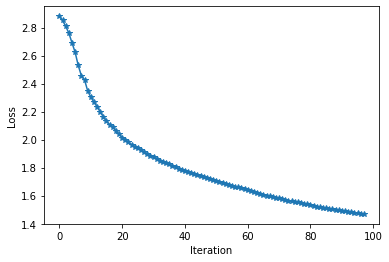

In [32]:
n_hidden = 128
rnn = RNNNet(n_letters, n_hidden, n_languages)
train(rnn, lr=0.0005, n_subsamples=100, subsample_size = 256)

coding style - splitting different things into pieces..  

train one batch/epoch
train setup
evaluation

inference

# LSTM

https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html


in RNN - 'h' state (hidden) - one state only

now - additional cell state

**two states** to be saved for the next step.

in fn "utility point of view", it be same RNN....  
same args for init, forward, etc.

In [33]:
class LSTMNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        
        self.hidden_size = hidden_size
        # this is to be used by the init function
        
        
        # BLOCKS:
        
        self.lstm_cell = nn.LSTM(input_size, hidden_size) #lstm object
        # https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        # shows what its internally doing.
        # computation of hidden state, cell state.. here.. 
        
        # hidden state to output (not input to output like in rnn n/w before)
        self.h2o = nn.Linear(hidden_size, output_size)
        
        self.softmax = nn.LogSoftmax(dim=2)
    
    def forward(self, input_t, hidden_t_1):
        # arg: hidden - tuple of hidden-state(index-0) and cell-state(index-1)
        
        # can write it differently, eg: addition arg in forward for cell state
        # doing this way to keep the "fn signature" same as RNN.
        # so that we can use the same train, eval, etc.
        
        out, hidden_t = self.lstm_cell(input_t.view(1, 1, -1), hidden_t_1)
        # lstm returns output, tuple of hidden, cell states
        
        # input reshaped into 1x1xsomething
        # here 1x1xn_all_letters
        # in general 1 x batch_size x vector-size-of-one-input-repr
        # first index - we can give mutiple inputs together. (vectorising)
        
        # only on 'hidden-state'
        output = self.h2o(hidden_t[0]) # ouput from 'current' hidden state
        
        output = self.softmax(output) # dim = 2
        # flatten
        return output.view(1, -1), hidden_t
    
    def init_hidden(self):
        return (torch.zeros(1, 1, self.hidden_size), torch.zeros(1, 1, self.hidden_size))
    
    # 1x1xlayer_size 
    # lstm allow number_of_layersx1xlayer_size - ie a multilayer n/w as the unit thing.
    # here we are using a simple - single layer unit thing.
    
    # second index - batches. - passing batch together as input
    # vectorization - improves performance.
    # we are not doing that now. - later

here output from current hidden state - like in theory .. unlike before.

batching:  
vectorisation - better performance  (parallel operation.. )
finding gradient every batch - faster  

here we are doing the second one .. but not first.

Iteration 99 Top-1: 0.5518703241895262 Top-2: 0.6790523690773067 Loss 1.8086339235305786


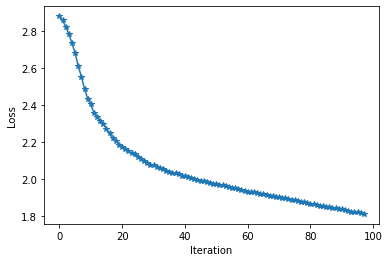

In [34]:
n_hidden = 128
lstm = LSTMNet(n_letters, n_hidden, n_languages)
train(lstm, subsample_size = 256, n_subsamples=100, lr=0.0005)

# using the same functions for training, etc.. 

# GRU

https://pytorch.org/docs/stable/generated/torch.nn.GRU.html

only 'hidden state' saved. (one state)

not a tuple of two states.

but as GRU also allows, multiple batches, multiple inputs, .. dimensions are like so.

In [35]:
class GRUNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        
        self.hidden_size = hidden_size
        
        # BLOCKS:
        
        # gru
        self.gru_cell = nn.GRU(input_size, hidden_size)
        
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)
    
    def forward(self, input_t, hidden_t_1):
        
        out, hidden_t = self.gru_cell(input_t.view(1, 1, -1), hidden_t_1)
        
        output = self.h2o(hidden_t)
        output = self.softmax(output) # dim = 2
        return output.view(1, -1), hidden_t
    
    def init_hidden(self):
        return torch.zeros(1, 1, self.hidden_size)

Iteration 99 Top-1: 0.5760598503740648 Top-2: 0.7354114713216957 Loss 1.6652683019638062


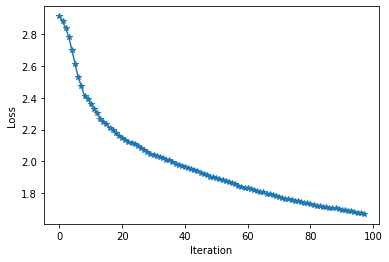

In [36]:
n_hidden = 128
gru = GRUNet(n_letters, n_hidden, n_languages)
train(gru, subsample_size=256, n_subsamples=100, lr=0.0005)

batches - vectorization, parallel operation.  

They should be of same size.